In [30]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#Load dataset
df = pd.read_csv("../data/raw data/BrentOilPrices.csv")

In [ ]:
#basic inspection
df.head()


3773       01-Apr-02
4028       01-Apr-03
4287       01-Apr-04
4546       01-Apr-05
5307       01-Apr-08
            ...     
8725    Sep 29, 2021
8978    Sep 29, 2022
8472    Sep 30, 2020
8726    Sep 30, 2021
8979    Sep 30, 2022
Name: Date, Length: 9011, dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9011 entries, 3773 to 8979
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 211.2+ KB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\ltlid\AppData\Local\Temp\ipykernel_14712\2394721818.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [16]:
# Sort by date 
df = df.sort_values('Date')

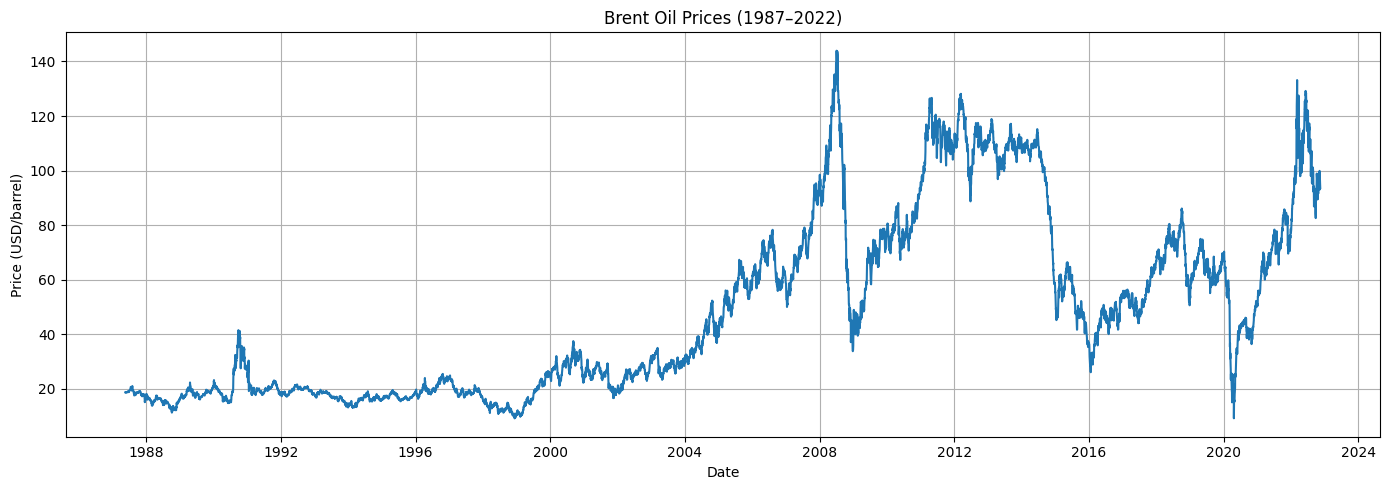

In [17]:
# Plot raw price data
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Price'])
plt.title('Brent Oil Prices (1987–2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
events_df = pd.read_csv("../data/raw data/events.csv")
events_df.head()

,Event,StartDate,Type
0,Gulf War,1990-08-02,Conflict
1,9/11 Attacks,2001-09-11,Geopolitical
2,Iraq War,2003-03-20,Conflict
3,Global Financial Crisis,2008-09-15,Economic
4,Arab Spring,2010-12-17,Political Unrest


In [26]:

events_df['StartDate'] = pd.to_datetime(events_df['StartDate'])
events_df.head()

,Event,StartDate,Type
0,Gulf War,1990-08-02,Conflict
1,9/11 Attacks,2001-09-11,Geopolitical
2,Iraq War,2003-03-20,Conflict
3,Global Financial Crisis,2008-09-15,Economic
4,Arab Spring,2010-12-17,Political Unrest


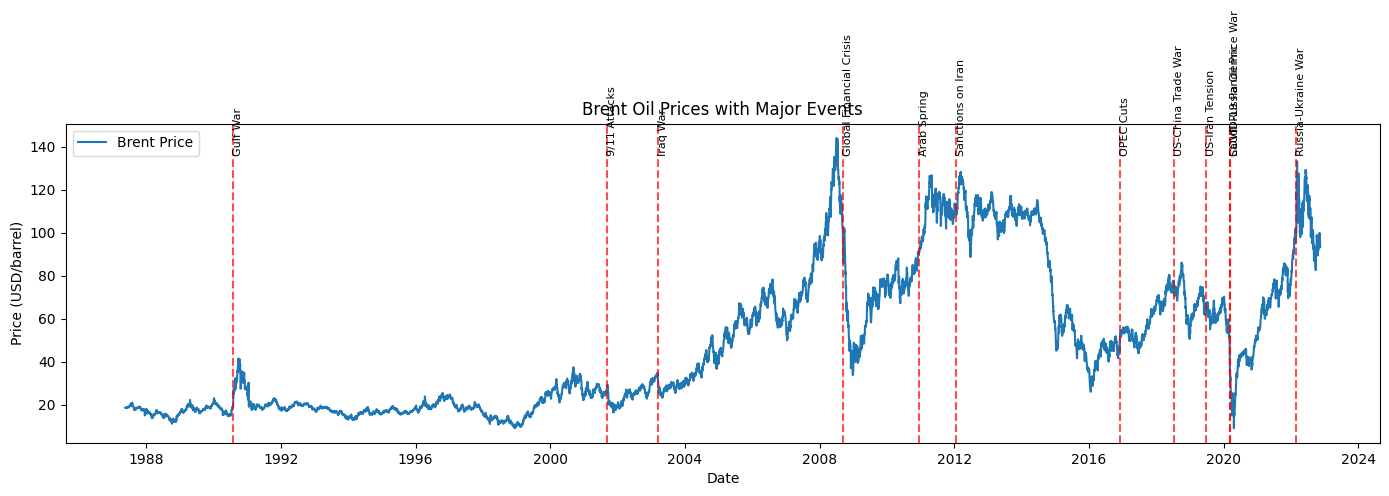

In [33]:
# Plot prices with event markers
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], df['Price'], label='Brent Price')
for _, row in events_df.iterrows():
    plt.axvline(row['StartDate'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['StartDate'], df['Price'].max()*0.95, row['Event'], rotation=90, fontsize=8)

plt.title('Brent Oil Prices with Major Events')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.tight_layout()
plt.savefig('../reports/brent_prices_with_events.png')  # Save the figure
plt.show()


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


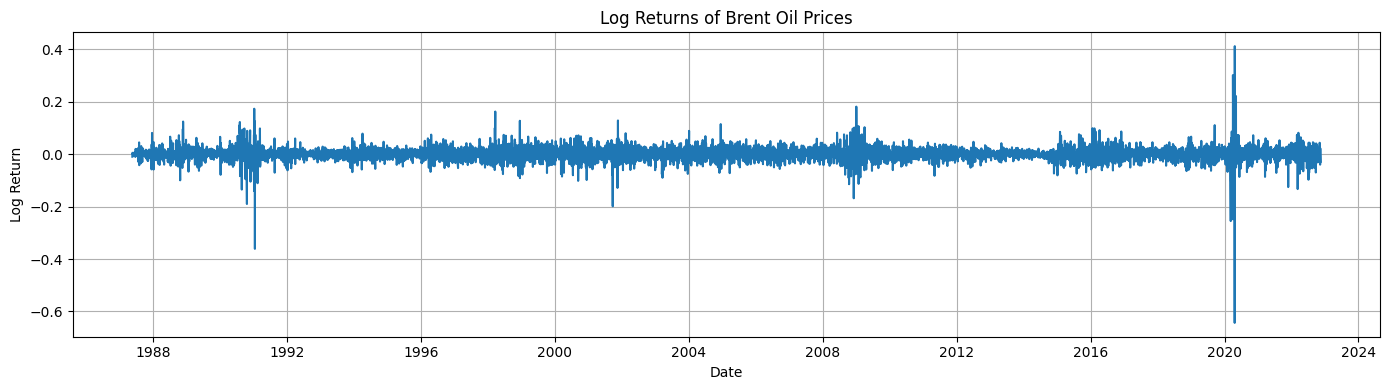

ADF Statistic (Log Return): -16.427113494485894
p-value (Log Return): 2.4985801611428892e-29


In [32]:
from statsmodels.tsa.stattools import adfuller

# Check for stationarity using Augmented Dickey-Fuller test
result = adfuller(df['Price'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

# Log return transformation
df['LogPrice'] = np.log(df['Price'])
df['LogReturn'] = df['LogPrice'].diff()

# Plot log returns
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['LogReturn'])
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.grid(True)
plt.tight_layout()
plt.savefig("../reports/log_returns_plot.png") #save the figure
plt.show()

# Re-run ADF test on log returns
result2 = adfuller(df['LogReturn'].dropna())
print(f"ADF Statistic (Log Return): {result2[0]}")
print(f"p-value (Log Return): {result2[1]}")


## Time Series Properties: Trend & Stationarity (Updated)

## From the first graph (Brent Price with Events):

    A long-term upward trend is visible from ~2000 to 2008, followed by periods of high volatility.
    Notable price collapses align with global shocks: 2008 Financial Crisis, 2020 COVID-19, and 2022 Russia-Ukraine War.
    Visual alignment of some major events with price spikes or drops is evident.

## From the second graph (Log Returns):
    The return series shows stationary behavior — its mean and variance appear stable over time.
    There are visible volatility spikes during crisis events (e.g., extreme dip during early COVID-19).

## ADF (Augmented Dickey-Fuller) Test Results:
    Series	    ADF Statistic	  p-value	    Interpretation
    Price	          -1.99     	0.289	       ❌ Non-stationary
    Log Returns	     -16.43	        2.5 × 10⁻²⁹	   ✅ Stationary

## Interpretation:
    The raw Brent oil price series is non-stationary, meaning its statistical properties (e.g., mean, variance) change over time. This makes it unsuitable for many time series models in its raw form.

    The log return series is stationary, meaning its distribution remains stable over time — making it better suited for statistical modeling and change point analysis.

